In [7]:
from glotaran_tools.specification_parser import parse_yml
from glotaran_core.model import Dataset
from glotaran_models.kinetic import KineticSeperableModel
import numpy as np
from lmfit import Parameters
# Imports for plotting

import matplotlib.pyplot as plt
%matplotlib notebook

fitspec = '''
type: kinetic

parameter: {}

compartments: [s1, s2, s3]

megacomplexes:
    - label: mc1
      k_matrices: [k1]
    - label: mc2
      k_matrices: [k2]

k_matrices:
  - label: "k1"
    matrix: {{
      '("s1","s1")': 1,
      '("s2","s2")': 2,
      '("s3","s3")': 3,
}}

initial_concentrations: []

irf: []

datasets: 
  - label: dataset1
    type: spectral
    megacomplexes: [mc1]
    path: 'data/dataset1.ascii'

'''
   

In [2]:
test_parameter = [101e-4, 202e-5, 505e-6]
test_amps = [1,2,3]
times = np.asarray(np.arange(0, 1500, 1.5))
simparams = Parameters()
simparams.add("p1", 101e-3)
simparams.add("p2",202e-4)
simparams.add("p3",505e-5)

simparams.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr
p1     0.101     -inf      inf     None     True     None
p2    0.0202     -inf      inf     None     True     None
p3   0.00505     -inf      inf     None     True     None


In [3]:
model = parse_yml(fitspec.format(test_parameter))

In [4]:
fitmodel = KineticSeperableModel(model)
fitmodel.get_initial_fitting_parameter().pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr
p1    0.0101     -inf      inf     None     True     None
p2   0.00202     -inf      inf     None     True     None
p3  0.000505     -inf      inf     None     True     None


None
False
None
False


<IPython.core.display.Javascript object>


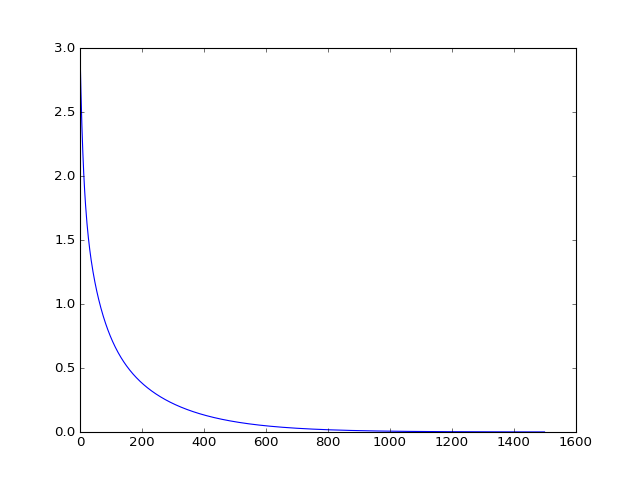

(1000, 1)


In [20]:
data = fitmodel.eval(simparams, *times, **{'dataset':'dataset1'})

fig = plt.figure()
plt.plot(times, data[:, 0])

In [6]:
result = fitmodel.fit(fitmodel.get_initial_fitting_parameter(), 
                      *times, 
                      **{"data": data}
                     )
result.params.pretty_print()

None
False
None
False
None
False
None
False
None
False
None
False
None
False
None
False
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.0686e+00                                    1.92e+02    
None
False
None
False
None
False
None
False
None
False
None
False
None
False
None
False
       1              2         1.3858e+00      6.83e-01       1.03e-02       1.54e+02    
None
False
None
False
None
False
None
False
None
False
None
False
None
False
None
False
None
False
None
False
       2              4         9.8320e-01      4.03e-01       5.16e-03       2.35e+02    
None
False
None
False
None
False
None
False
None
False
None
False
None
False
None
False
       3              5         5.0532e-01      4.78e-01       1.03e-02       2.25e+02    
None
False
None
False
None
False
None
False
None
False
None
False
None
False
None
False
       4              6         1.9729e-01      3.08e-01       2.01e-02       2.40e